# 2 PyTorch 基础

## 2.6 使用 Numpy 实现机器学习

[[2.98927619]] [[2.09818307]]


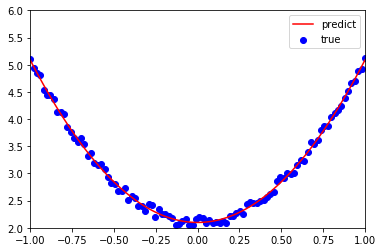

In [1]:
# 1) 导入需要的库
import numpy as np
# %matplotlib inline
from matplotlib import pyplot as plt

# 2) 生成输入数据 x 及目标数据 y
# 设置随机数种子，生成同一份数据，以便用多种方法进行比较
np.random.seed(100)
x = np.linspace(-1, 1, 100).reshape(100, 1)
y = 3*np.power(x, 2) +2 + 0.2*np.random.rand(x.size).reshape(100,1)

# 3) 查看 x,y 数据分布情况
# 画图
# plt.scatter(x, y)
# plt.show()

# 4) 初始化权重参数
# 随机初始化参数
w1 = np.random.rand(1, 1)
b1 = np.random.rand(1, 1)

# 5) 训练模型
lr = 0.001

for i in range(800):
    y_pred = np.power(x,2) * w1 + b1

    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()

    grad_w = np.sum((y_pred - y) * np.power(x, 2))
    grad_b = np.sum((y_pred - y))

    w1 -= grad_w * lr
    b1 -= grad_b * lr

    # print(loss)
print(w1,b1)
plt.plot(x, y_pred, 'r-', label='predict')
plt.scatter(x, y, color='blue', marker='o', label='true')
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()





## 2.7 使用 Tensor 及 Autograd 实现机器学习

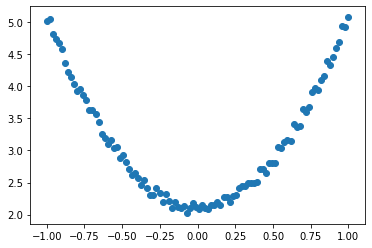

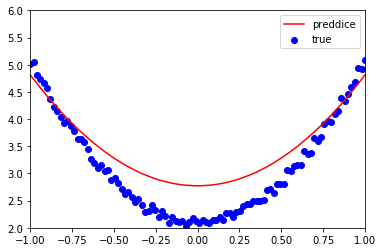

tensor([[2.5030]], requires_grad=True) tensor([[3.6271]], requires_grad=True)


In [34]:
# 1) 导入需要的库
import torch as t
# %matplotlib inline
from matplotlib import pyplot as plt

# 2) 生成输入数据 x 及目标数据 y
t.manual_seed(100)
dtype = t.float
# 生成 x 坐标数据，x 为 tensor，需要把 x 的形状转换为 100x1
x = t.unsqueeze(t.linspace(-1, 1, 100), dim=1)
# 生成 y 坐标数据，y 为 tensor，形状为 100x1，另加上一些噪声
y = 3 * x.pow(2) + 2 + 0.2 * t.rand(x.size(),requires_grad=True).view(100, 1)

# 画图，把 tensor 数据转换为 numpy 数据
plt.scatter(x.detach().numpy(), y.detach().numpy())
plt.show()

# 3) 初始化权重参数
# 随机初始化参数，参数 w、b 为需要学习的，故需 requires_grad=True
w = t.randn(1, 1, dtype = dtype, requires_grad=True)
b = t.zeros(1, 1, dtype = dtype, requires_grad=True)

# 4) 训练模型
lr = 0.001

for ii in range(80):
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()

    # 自动计算梯度，梯度存放在 grad 属性中
    loss.backward(retain_graph=True)
    # loss.backward()

    # 手动更新参数，需要用 torch.no_grad()，使上下文环境中切断自动求导的计算
    with t.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # 梯度清零
        w1.grad.zero_()
        b1.grad.zero_()
# 5) 可视化训练结果
plt.plot(x.detach().numpy(), y_pred.detach().numpy(), 'r-', label='preddice') # Predict
plt.scatter(x.detach().numpy(), y.detach().numpy(), color='blue', marker='o', label='true') # True data
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()

print(w, b)

# 3 PyTorch 神经网络工具箱

# 4 PyTorch数据处理工具箱

# 5 机器学习基础

# 6 视觉处理基础

# 7 自然语言处理基础

# 8 生成式深度学习

## 8.1 用变分自编码器生成图像

In [ ]:
# 定义重构损失函数及 KL 散度
reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
# 两者相加得总损失
loss = reconst_loss + kl_div



In [ ]:
# 1) 导入需要的包
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image

In [ ]:
# 2) 定义一些超参数
image_size       = 784
h_dim            = 400
z_dim            = 20
num_epochs       = 30
batch_size       = 128
learning_rate    = 0.001

In [ ]:
# 3) 对数据集进行预处理
# 下载 MNIST 训练集
dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transforms.ToTensor(), download=False)
# 数据加载
data_loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# 4) 构建 AVE 模型，主要由 Encode 和 Decode 两部分组成
# 定义 AVE 模型
class VAE(nn.Module):
    def __init__(self, image_size=784, h_dim=400, z_dim=20):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(image_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, image_size)
    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)

# 用 mu，log_var 生成一个潜在空间点 z，mu，log_var 为两个统计参数，我们假设这个建设分布能生成图像
def reparameterize(self, mu, log_var):
    std = torch.exp(log_var/2)
    eps = torch.rand_like(std)
    return mu+eps*std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return F.sigmoid(self.fc5(h))

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var

In [ ]:
# 5) 选择 GPU 及优化器
# 设置 PyTorch 在哪块 GPU 上运行，这里假设使用序号为 0 的这块 GPU
torch.cuda.set_device(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 6) 训练模型，同时保存原图像与随机生成的图像
with torch.no_grad():
    # 保存采样图像，及潜在向量 Z 通过解码器生成的新图像
    z = torch.randn(batch_size, z_dim).to(device)
    out = model.decode(z).view(-1, 1, 28, 28)
    save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch+1)))

    # 保存重构图像，即原图像通过解码器生成的图像
    out, _, _ = model(x)
    x_concat = torch.cat([x.view(-1, 1, 28, 28), out.view(-1, 1, 28, 28)], dim=3)
    save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch+1)))

In [ ]:
# 7) 展示原图像及重构图像
reconsPath = './ave_samples/reconst-30.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图像
plt.asix('off') # 不显示坐标轴
plt.show()

In [ ]:
# 8) 显示由潜在空间点 Z 生成的新图像
genPath = './ave_samples/sampled-30.png'
Image = mpimg.imread(genPath)
plt.imshow(Image) # 显示图像
plt.asix('off') # 不显示坐标轴
plt.show()

## 8.2 GAN 简介

In [ ]:
# 定义判断器对真图像的损失函数
outputs = D(images)
d_loss_real = criterion(outputs, real_labels)

In [ ]:
# 定义判别器对假图像（即由潜在空间点生成的图像）的损失函数
z = torch.randn(batch_size, latent_size).to(device)
fake_images = G(z)
outputs = D(fake_images)
d_loss_fake = criterion(outputs, fake_labels)
fake_score = outputs
# 得到判别器总的损失函数
d_loss = d_loss_real + d_loss_fake

In [ ]:
z = torch.randn(batch_size, latent_size).to(device)
fake_images = G(z)
outputs = D(fake_images)

g_loss = criterion(outputs, real_labels)

## 8.3 用 GAN 生成图像

### 8.3.1 判别器

In [ ]:
# 构建判断器
D = nn.Sequential(
    nn.Linear(image_size, hidden_size), 
    nn.LeakyReLU(0.2), 
    nn.Linear(hidden_size, hidden_size), 
    nn.LeakyReLU(0.2), 
    nn.Linear(hidden_size, 1), 
    nn.Sigmoid())

### 8.3.2 生成器

In [ ]:
# 构建生成器
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size), 
    nn.ReLU(), 
    nn.Linear(hidden_size, hidden_size), 
    nn.ReLU(), 
    nn.Linear(hidden_size, image_size), 
    nn.tanh())

### 8.3.3 训练模型

In [ ]:
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)

        # 定义图像是真或假的标签
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ----------------------------------------------
        # 训练判别器
        # ----------------------------------------------
        
        # 定义判别器对真图像的损失函数
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # 定义判别器对假图像（即由潜在空间点生成的图像）的损失函数
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # 对生成器、判别器的梯度清零
        reset_grad()
        d_loss.backward()
        d_optimizer.step()

        # ------------------------------------------------
        # 训练生成器
        # ------------------------------------------------

        # 定义生成器对假图像的损失函数，这里我们要求判别器生成的图像越来越像真图片
        # 故损失函数中的标签改为真图像的标签，即希望生成的假图像，越来越靠近真图像
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)

        g_loss = criterion(outputs, real_labels)
        
        # 对生成器、判别器的梯度清零，进行反向传播及运行生成器的优化器
        reset_grad()
        g_loss.backward()
        g_optimizer.step()

        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}'.format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()))
        # 保存真图像
        if (epoch+1) == 1:
            images = images.reshape(images.size(0), 1, 28, 28)
            save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
        # 保存假图像
        fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
            save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))
    
    # 保存模型
    torch.save(G.state_dict(), 'G.ckpt')
    torch.save(D.state_dict(), 'D.ckpt')

### 8.3.4 可视化结果

In [ ]:
reconsPath = './gan_samples/fake_images-200.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()